In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import graphviz
import geopandas as gpd
import os

from scipy import stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

C:\Users\pavan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DataCoSC_df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\Data Mining\DataCoSupplyChainDataset.csv", encoding='latin-1')
DataCoSC_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## DATA CLEANING

In [3]:
DataCoSC_df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [4]:
DataCoSC_df.drop(['Category Id', 'Customer Email', 'Customer Id', 'Customer City','Customer State', 'Customer Street', 'Customer Zipcode', 'Order City', 'Order Region', 'Order State', 'Customer Password', 'Customer Zipcode', 'Department Id', 
                  'Order Customer Id', 'Order Id', 'Order Item Id', 'Product Card Id', 'Order Zipcode', 'Product Card Id', 
                  'Product Category Id', 'Product Description', 'Product Image', 'Customer Fname', 'Customer Lname'], axis=1, inplace=True)
DataCoSC_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer Country',
       'Customer Segment', 'Department Name', 'Latitude', 'Longitude',
       'Market', 'Order Country', 'order date (DateOrders)',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Status',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [5]:
DataCoSC_df.columns = [s.strip().replace(' ', '_'). replace('(', '').replace(")", '') for s in DataCoSC_df.columns]
DataCoSC_df.columns

Index(['Type', 'Days_for_shipping_real', 'Days_for_shipment_scheduled',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Name', 'Customer_Country',
       'Customer_Segment', 'Department_Name', 'Latitude', 'Longitude',
       'Market', 'Order_Country', 'order_date_DateOrders',
       'Order_Item_Cardprod_Id', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Status',
       'Product_Name', 'Product_Price', 'Product_Status',
       'shipping_date_DateOrders', 'Shipping_Mode'],
      dtype='object')

In [6]:
DataCoSC_df = DataCoSC_df.rename(columns={"order_date_DateOrders": "Order_Date"})
DataCoSC_df = DataCoSC_df.rename(columns={"shipping_date_DateOrders": "Shipping_Date"})

In [7]:
DataCoSC_df["Order_Date"] = pd.to_datetime(DataCoSC_df["Order_Date"], format='%m/%d/%Y %H:%M')
DataCoSC_df["Order_Date"].unique()

array(['2018-01-31T22:56:00.000000000', '2018-01-13T12:27:00.000000000',
       '2018-01-13T12:06:00.000000000', ...,
       '2016-01-21T02:47:00.000000000', '2016-01-20T07:10:00.000000000',
       '2016-01-17T05:56:00.000000000'], dtype='datetime64[ns]')

In [8]:
DataCoSC_df["Shipping_Date"] = pd.to_datetime(DataCoSC_df["Shipping_Date"], format='%m/%d/%Y %H:%M')
DataCoSC_df["Shipping_Date"].unique()

array(['2018-02-03T22:56:00.000000000', '2018-01-18T12:27:00.000000000',
       '2018-01-17T12:06:00.000000000', ...,
       '2016-01-25T02:47:00.000000000', '2016-01-23T07:10:00.000000000',
       '2016-01-21T05:56:00.000000000'], dtype='datetime64[ns]')

In [9]:
DataCoSC_df = DataCoSC_df.drop(columns = ["Benefit_per_order", 'Product_Price'])

In [10]:
DataCoSC_df.dtypes

Type                                   object
Days_for_shipping_real                  int64
Days_for_shipment_scheduled             int64
Sales_per_customer                    float64
Delivery_Status                        object
Late_delivery_risk                      int64
Category_Name                          object
Customer_Country                       object
Customer_Segment                       object
Department_Name                        object
Latitude                              float64
Longitude                             float64
Market                                 object
Order_Country                          object
Order_Date                     datetime64[ns]
Order_Item_Cardprod_Id                  int64
Order_Item_Discount                   float64
Order_Item_Discount_Rate              float64
Order_Item_Product_Price              float64
Order_Item_Profit_Ratio               float64
Order_Item_Quantity                     int64
Sales                             

In [11]:
DataCoSC_df.shape

(180519, 29)

In [12]:
for i in DataCoSC_df.columns:
    if DataCoSC_df[i].dtype=='object':
        print(i,len(DataCoSC_df[i].unique()))

Type 4
Delivery_Status 4
Category_Name 50
Customer_Country 2
Customer_Segment 3
Department_Name 11
Market 5
Order_Country 164
Order_Status 9
Product_Name 118
Shipping_Mode 4


In [13]:
data = DataCoSC_df

## EXPLORATIVE DATA ANALYSIS

<AxesSubplot:>

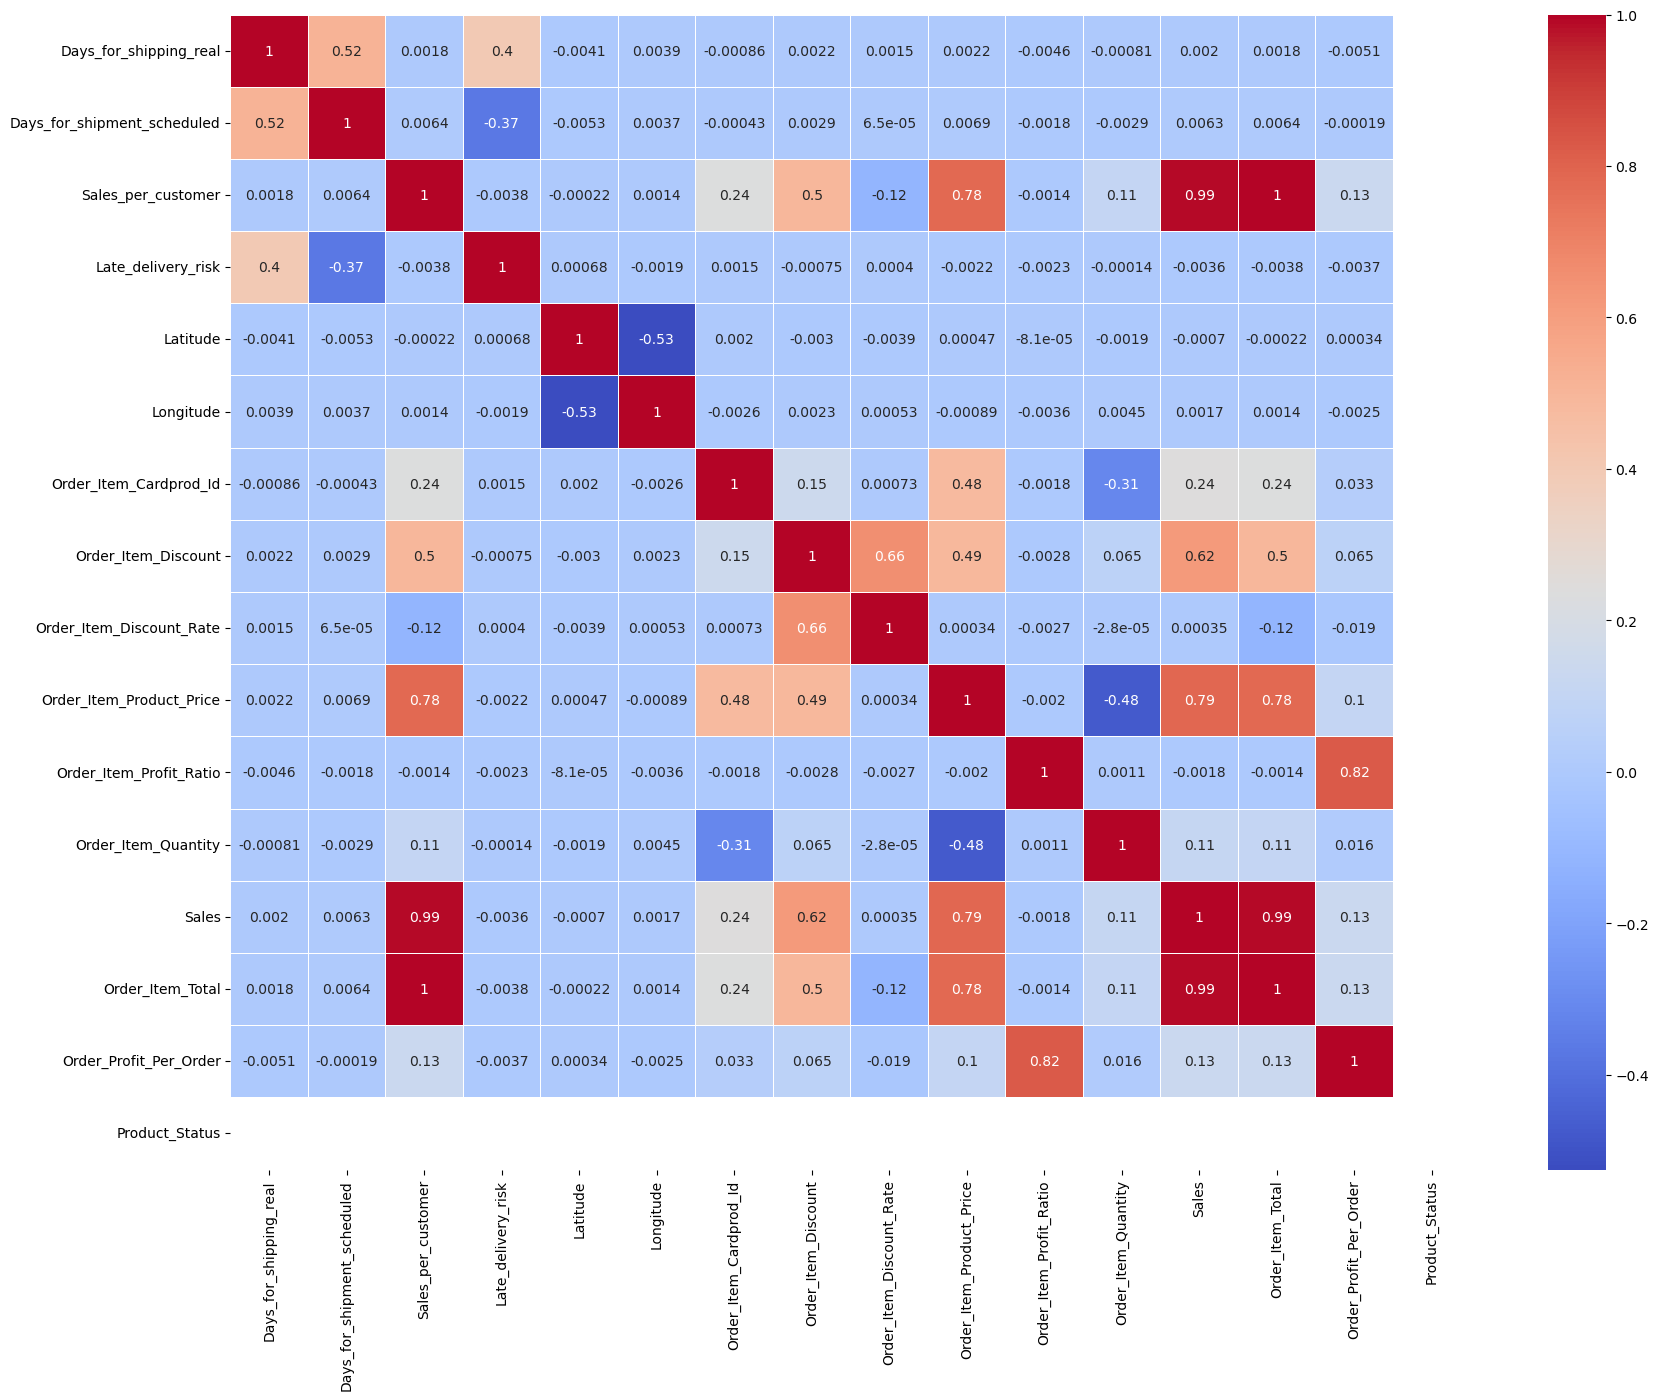

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(DataCoSC_df.corr(), annot=True, cmap="coolwarm", linewidths=.5)

In [21]:
plt.rcParams["figure.figsize"] = (15, 8)

def categ_dist(categ_var, y_param, title):
    
    sns.barplot(data= data, x=categ_var, y = y_param, order=data[categ_var].value_counts().index, palette='viridis')
    plt.title(title, size=20)
    plt.show()


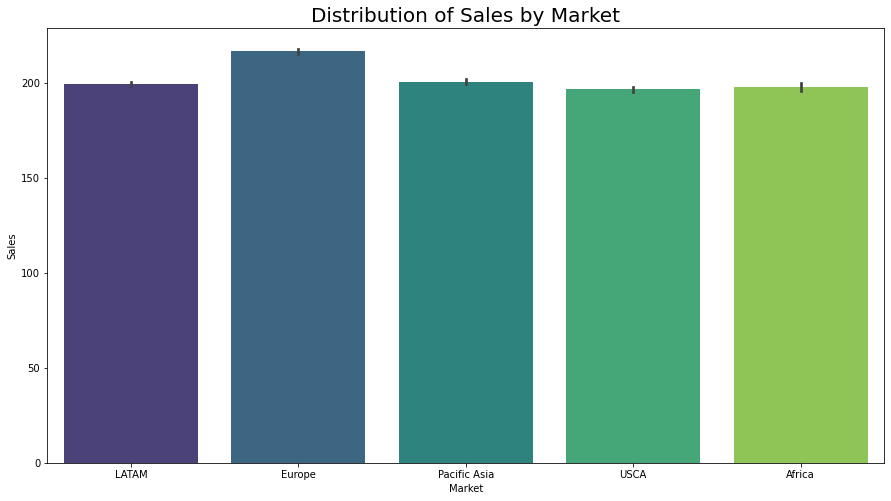

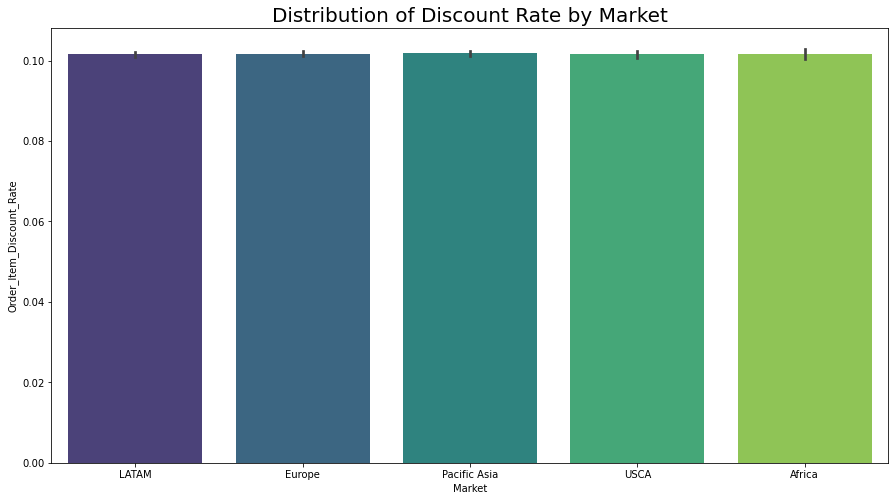

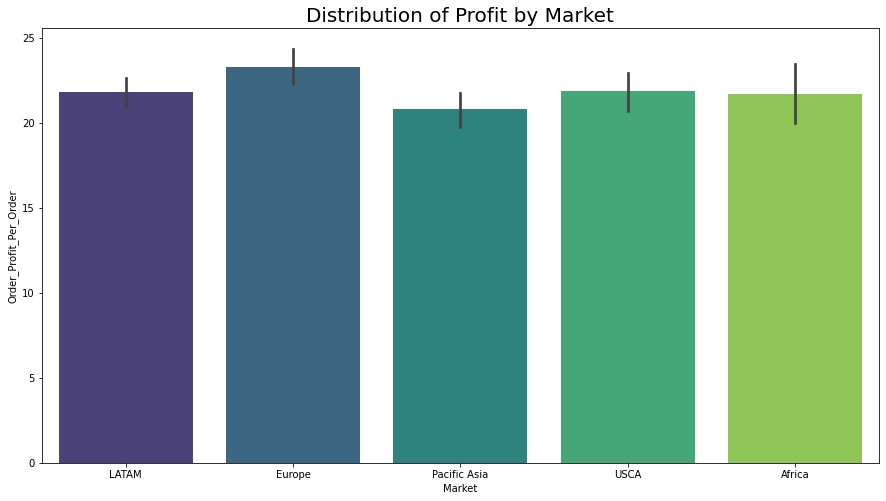

In [22]:
categ_dist('Market', 'Sales', 'Distribution of Sales by Market')
categ_dist('Market', 'Order_Item_Discount_Rate', 'Distribution of Discount Rate by Market')
categ_dist('Market', 'Order_Profit_Per_Order', 'Distribution of Profit by Market')




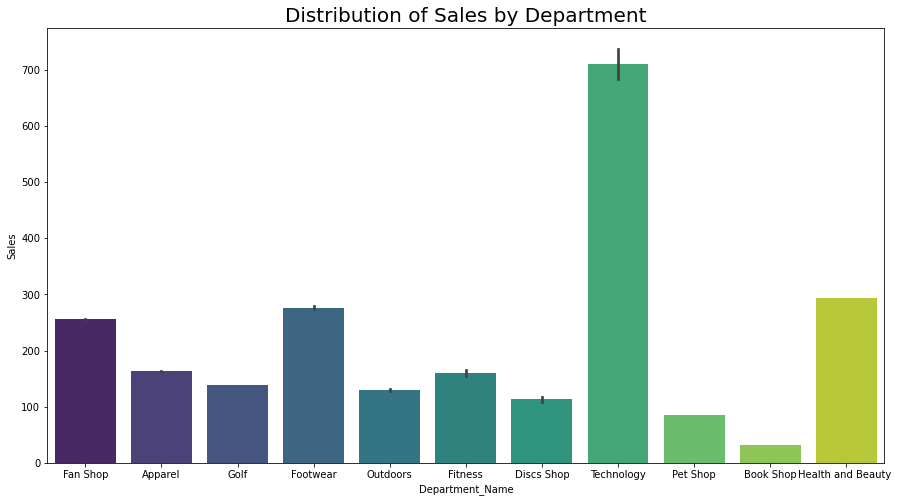

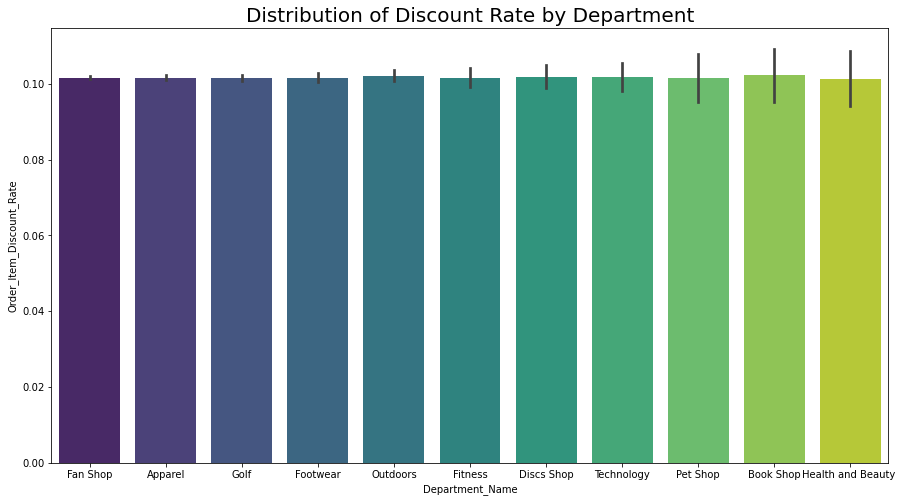

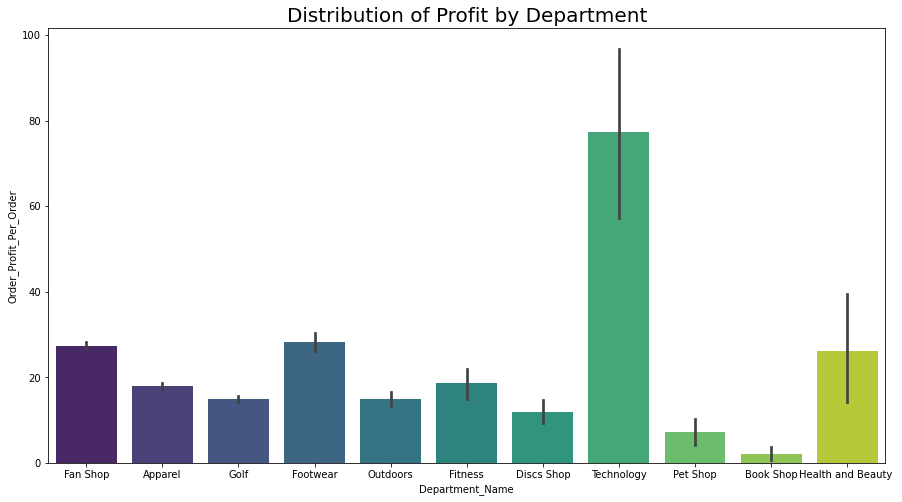

In [23]:
categ_dist('Department_Name', 'Sales', 'Distribution of Sales by Department')
categ_dist('Department_Name', 'Order_Item_Discount_Rate', 'Distribution of Discount Rate by Department')
categ_dist('Department_Name', 'Order_Profit_Per_Order', 'Distribution of Profit by Department')



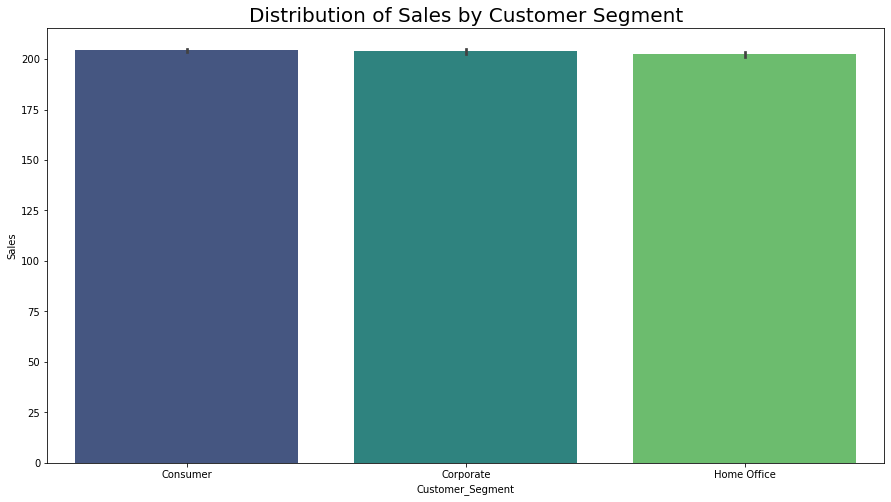

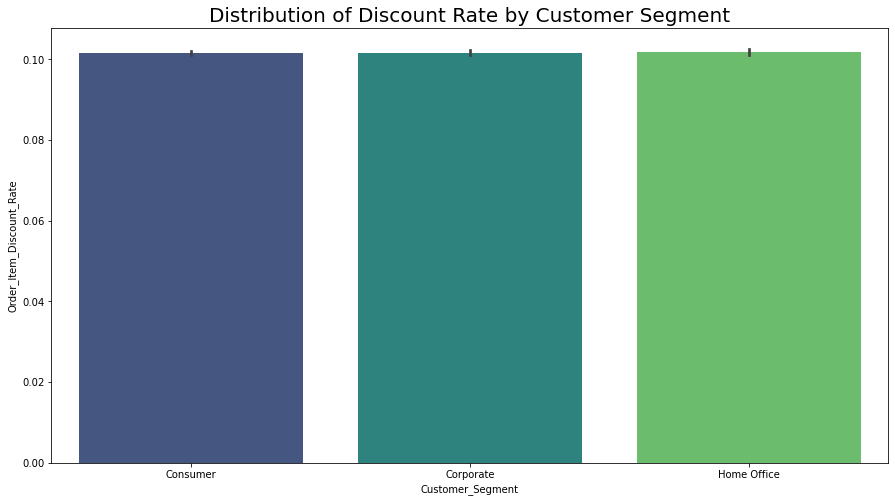

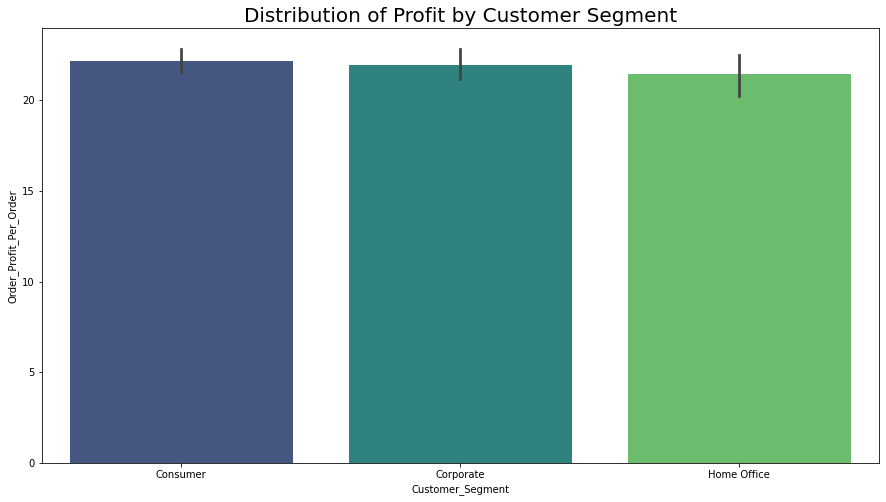

In [24]:
categ_dist('Customer_Segment', 'Sales', 'Distribution of Sales by Customer Segment')
categ_dist('Customer_Segment', 'Order_Item_Discount_Rate', 'Distribution of Discount Rate by Customer Segment')
categ_dist('Customer_Segment', 'Order_Profit_Per_Order', 'Distribution of Profit by Customer Segment')

In [25]:
def categ_count(categ_var, title):
    sns.countplot(data = data,x = data[categ_var],order= data[categ_var].value_counts().index, palette='gist_heat')
    plt.title(title, size = 20)
    plt.show()

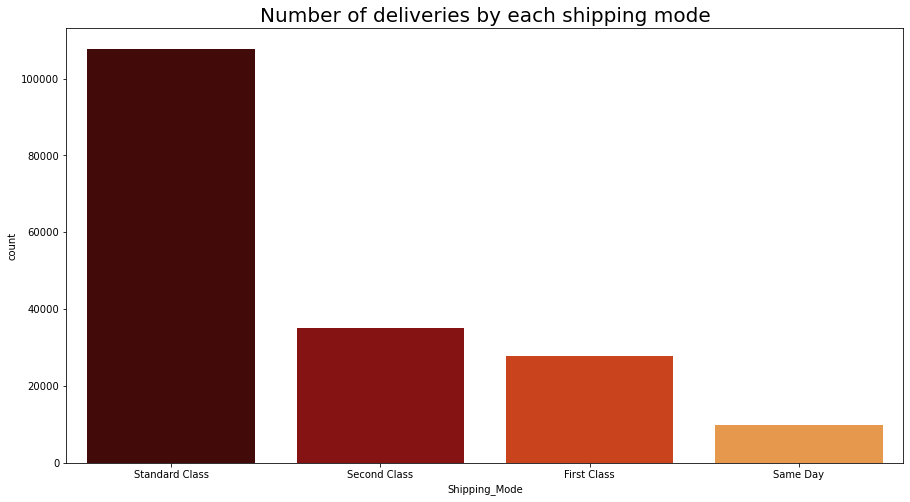

In [26]:
categ_count('Shipping_Mode', 'Number of deliveries by each shipping mode')

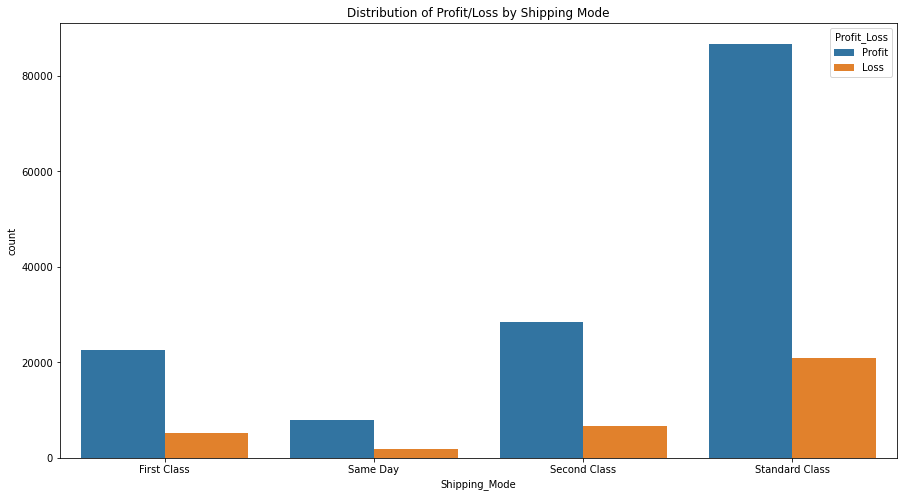

In [27]:
data['Profit_Loss'] = data['Order_Profit_Per_Order'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Shipping_Mode', hue='Profit_Loss', data=data)
plt.title('Distribution of Profit/Loss by Shipping Mode')
plt.show()

In [28]:
plt.rcParams["figure.figsize"] = (15, 8)

def categ_shipping(categ_var, title):
    
    sns.countplot(data= data, x=categ_var,hue='Shipping_Mode', order=data[categ_var].value_counts().index, hue_order = data['Shipping_Mode'].value_counts().index, palette='husl')
    plt.title(title, size=20)
    plt.legend(title= "Shipping Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

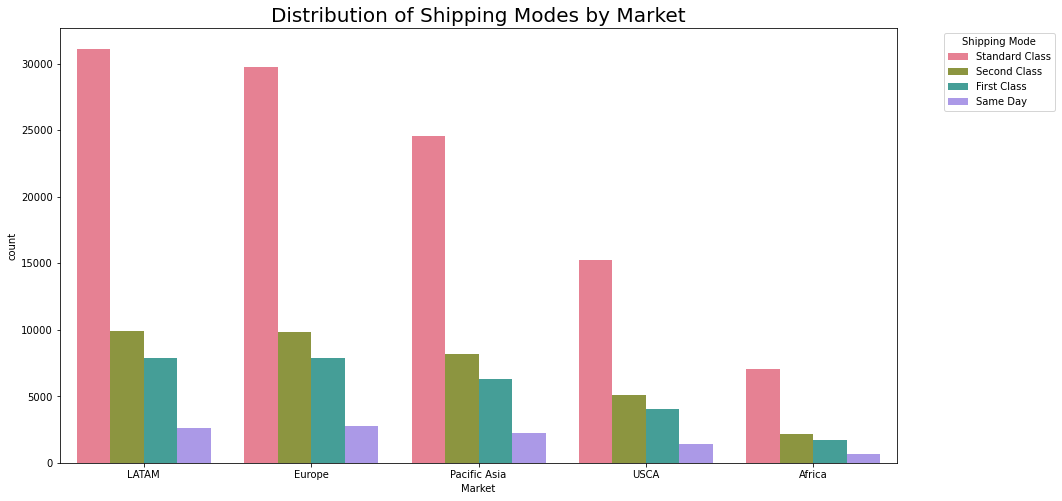

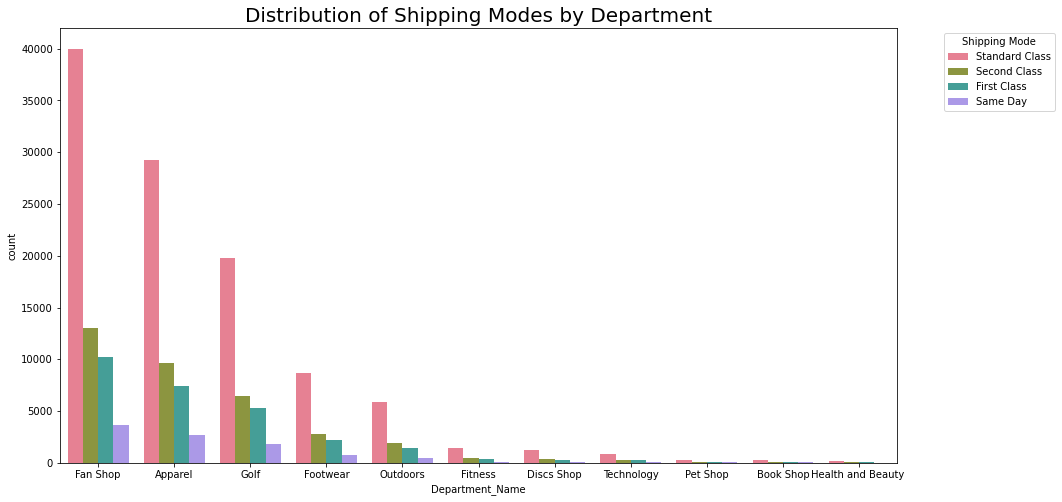

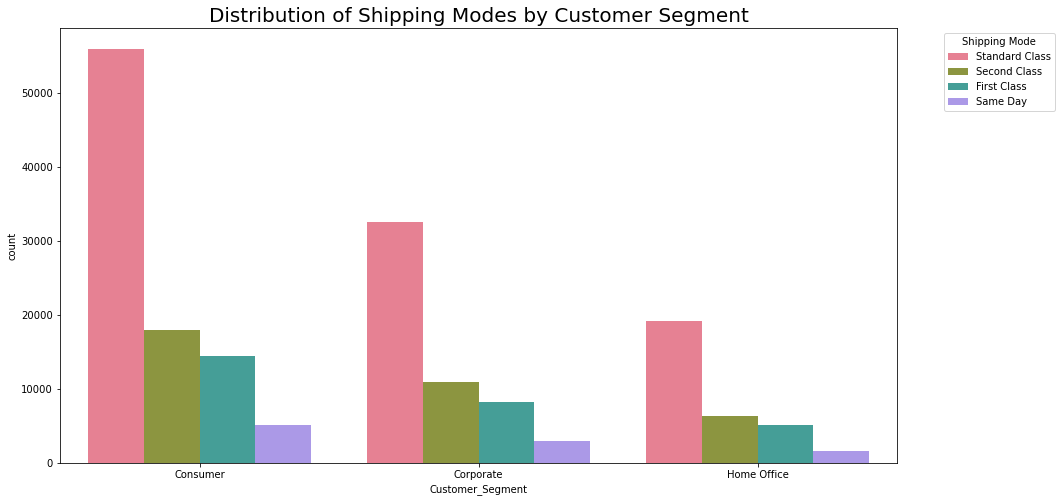

In [29]:
categ_shipping("Market",'Distribution of Shipping Modes by Market' )
categ_shipping('Department_Name', 'Distribution of Shipping Modes by Department')
categ_shipping('Customer_Segment', 'Distribution of Shipping Modes by Customer Segment')


In [30]:
def prod_region(column_to_group, title, n):

    grouped_data = data.groupby(['Product_Name', 'Customer_Country'])[column_to_group].sum().reset_index()
    sorted_grouped_data = grouped_data.sort_values(by=column_to_group, ascending=False)

    top_n = n  
    plt.figure(figsize=(12, 6))
    sns.barplot(x= column_to_group, y='Product_Name', hue='Customer_Country', data=sorted_grouped_data.head(top_n))
    plt.title(title.format(top_n))
    plt.xlabel(column_to_group)
    plt.ylabel('Product Name')
    plt.show()


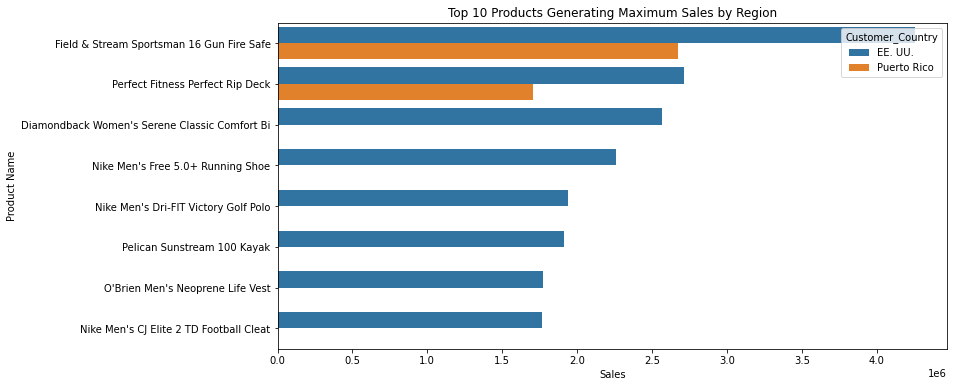

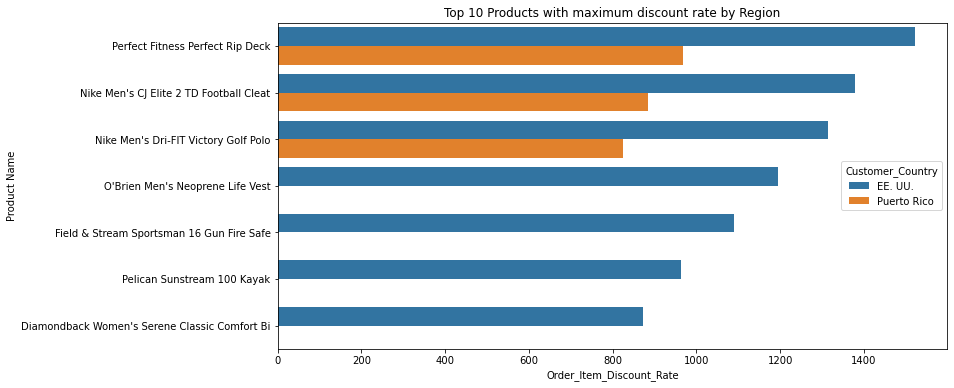

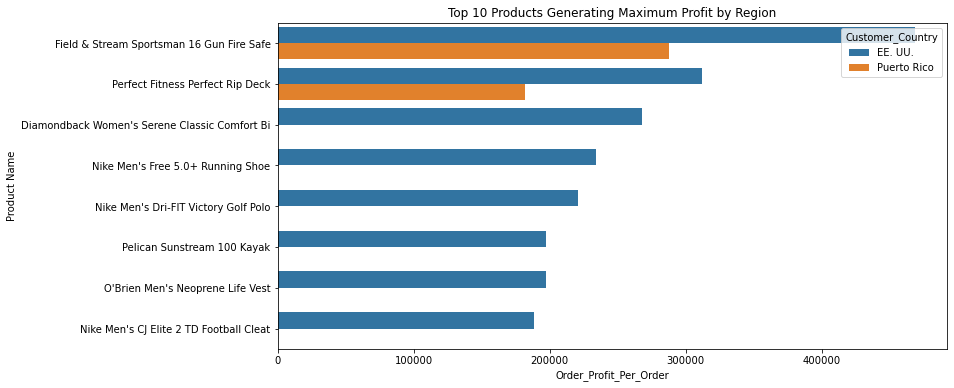

In [31]:
prod_region('Sales', 'Top 10 Products Generating Maximum Sales by Region', 10)
prod_region('Order_Item_Discount_Rate', 'Top 10 Products with maximum discount rate by Region', 10)
prod_region('Order_Profit_Per_Order', 'Top 10 Products Generating Maximum Profit by Region', 10)

In [32]:
import geopandas as gpd

C:\Users\pavan\AppData\Local\Temp\ipykernel_6852\1150326050.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


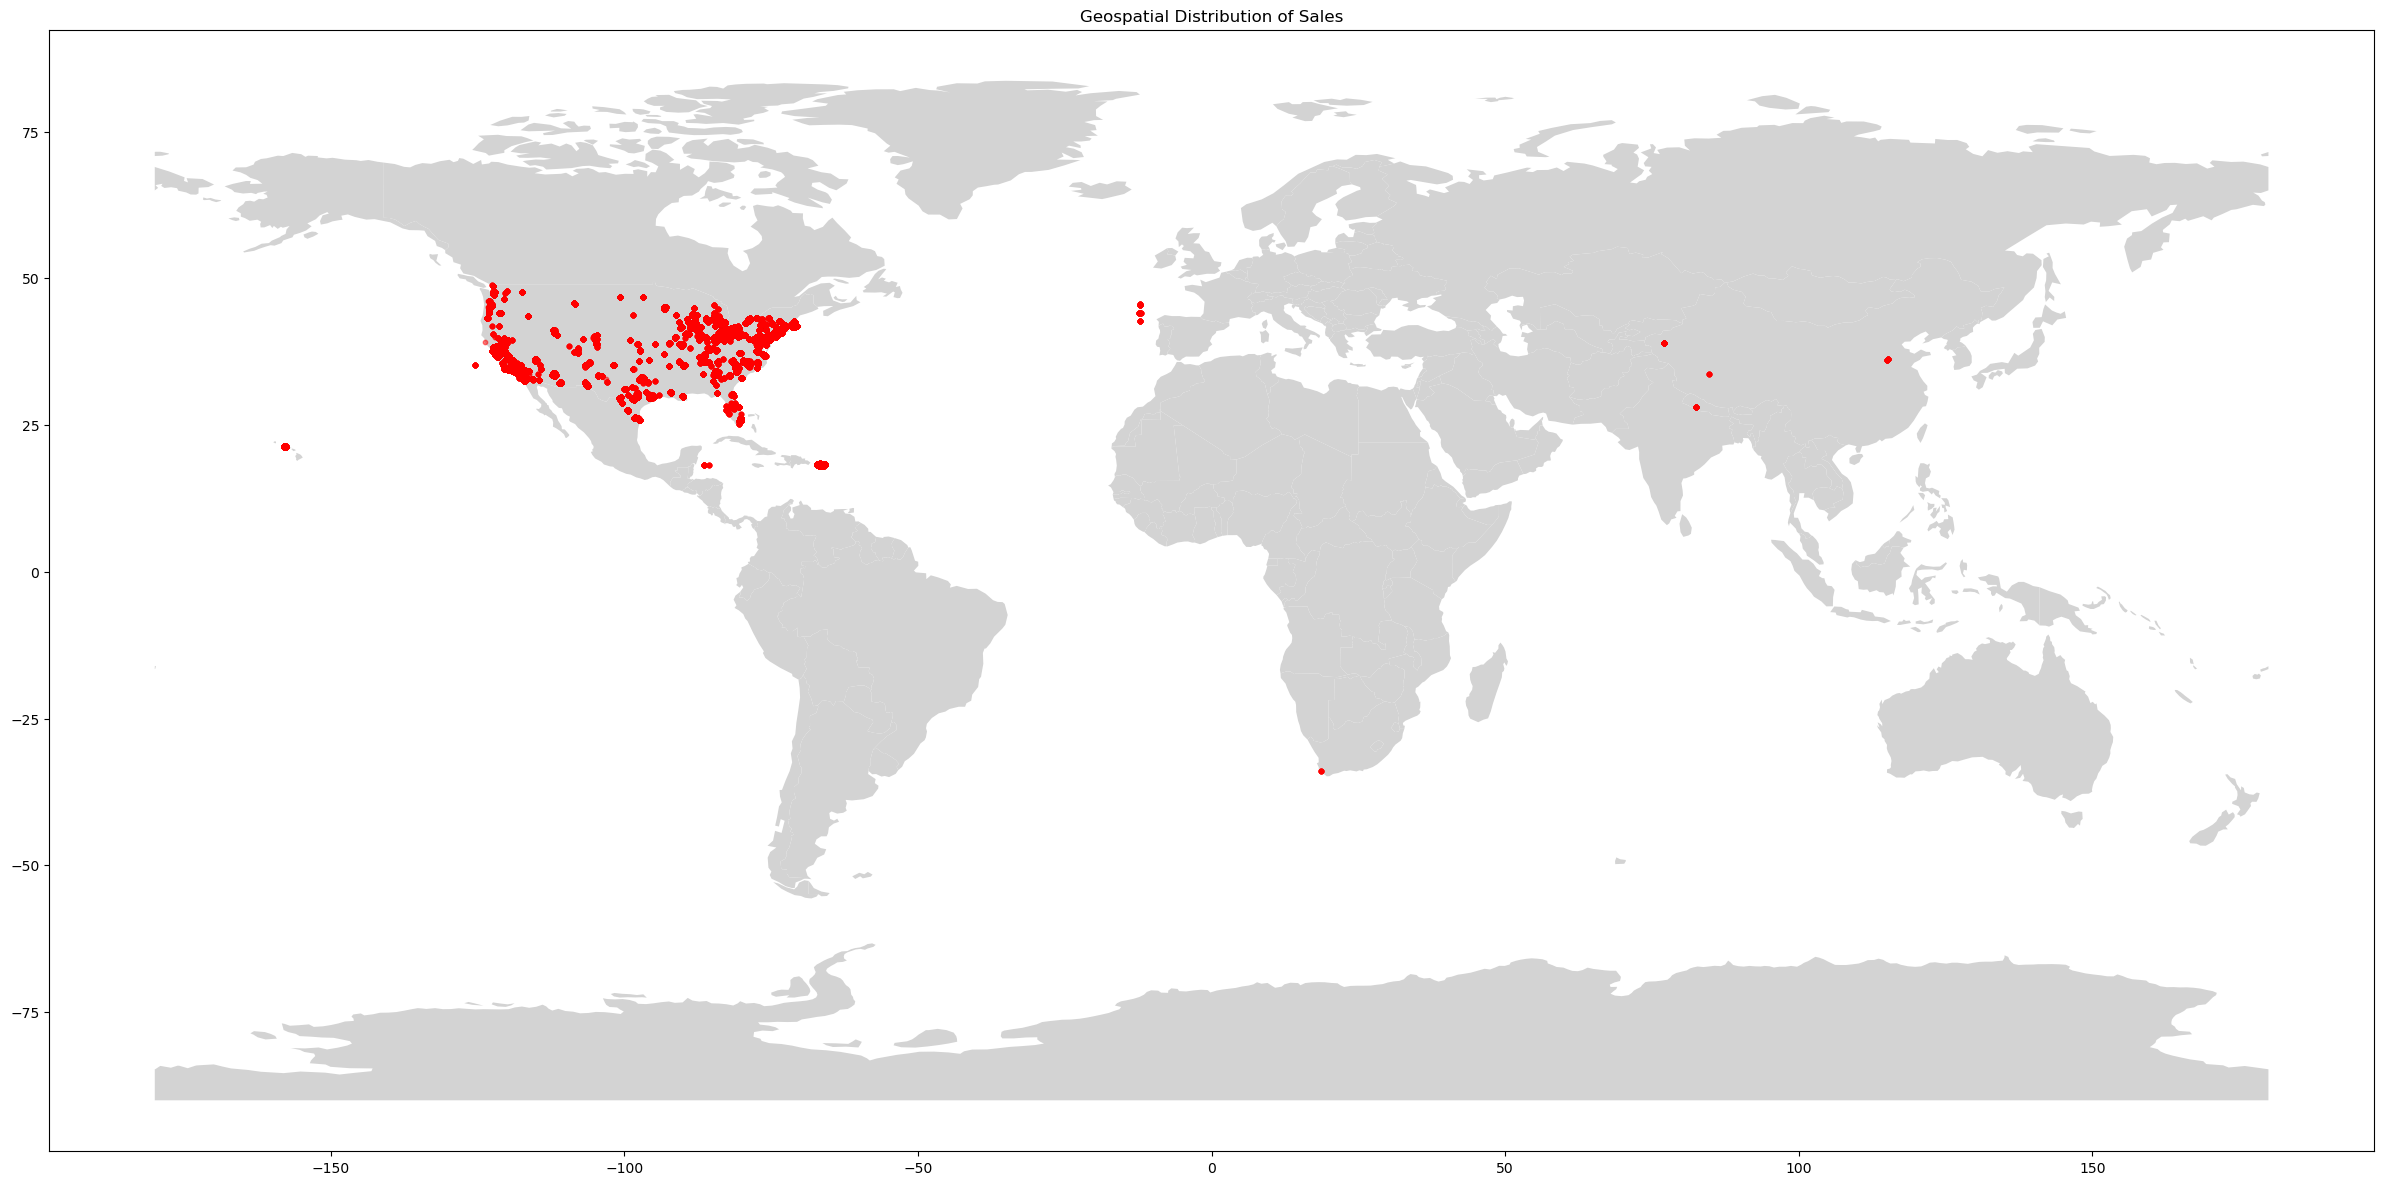

In [59]:
geometry = gpd.points_from_xy(data['Longitude'], data['Latitude'])
geo_df = gpd.GeoDataFrame(data, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(30,15))
world.plot(ax=ax, color='lightgrey')

geo_df.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title('Geospatial Distribution of Sales')
plt.show()


## SCATTERPLOTS FOR NUMERICAL VARIABLES TO DETECT OUTLIERS

In [34]:
## Sales, Order_Item_Total and Order_Item_Discount_Rate

In [14]:
def scatter(x_val, y_val):

    sns.regplot(x= x_val, y= y_val, data=data)
    plt.show()

In [15]:
def z_score_plot(x_val, y_val, threshold, title):
    
    sales_threshold = threshold
   
    data['Z_Score_Sales'] = np.abs(stats.zscore(data['Sales']))

    outliers = data[data['Z_Score_Sales'] > 3]

    plt.scatter(data[x_val], data[y_val], label='Data')
    plt.scatter(outliers[x_val], outliers[y_val], color='red', label='Outliers')

    plt.title(title)
    plt.xlabel(x_val)
    plt.ylabel(y_val)
    plt.axvline(x=sales_threshold, color='orange', linestyle='--', label=f'Sales Threshold: {sales_threshold}')

    plt.legend()
    plt.show()

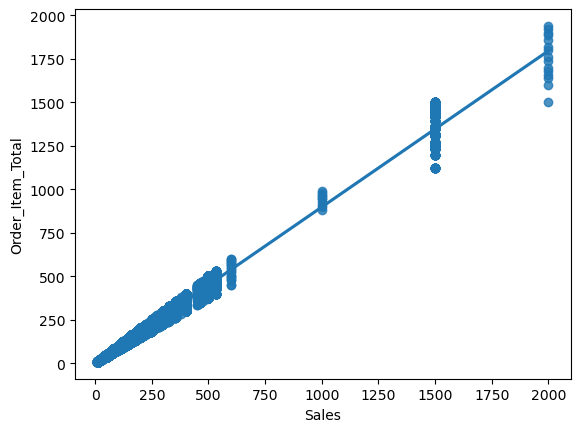

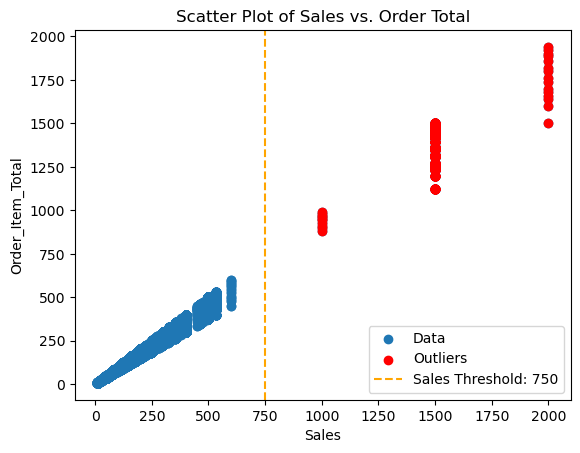

In [120]:
scatter('Sales', 'Order_Item_Total')
z_score_plot('Sales', 'Order_Item_Total', 750, 'Scatter Plot of Sales vs. Order Total' )

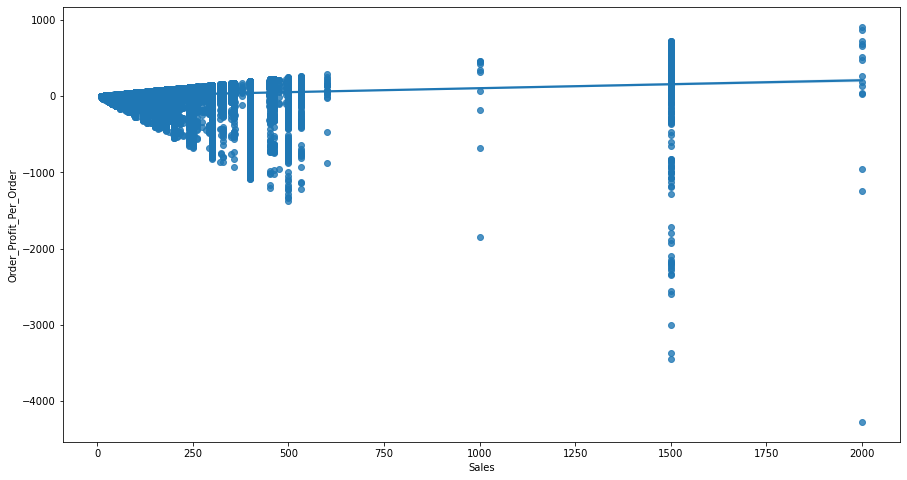

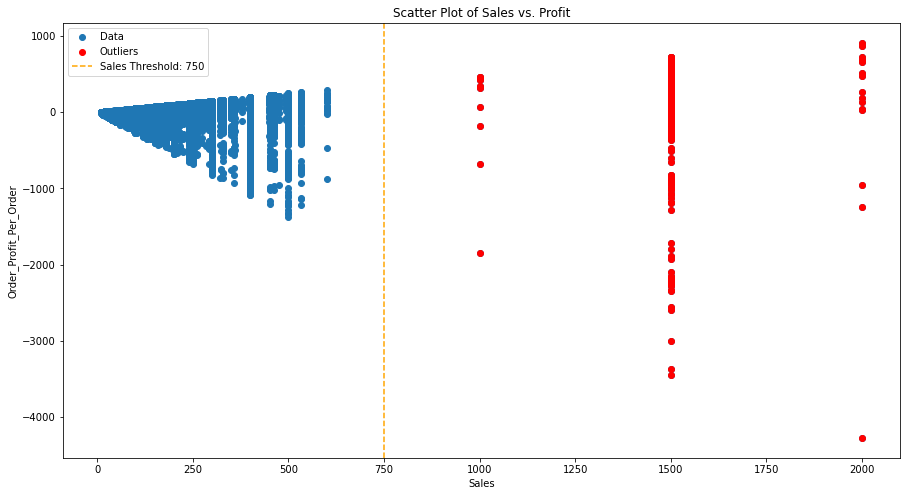

In [39]:
scatter('Sales', 'Order_Profit_Per_Order')
z_score_plot('Sales', 'Order_Profit_Per_Order', 750, 'Scatter Plot of Sales vs. Profit' )

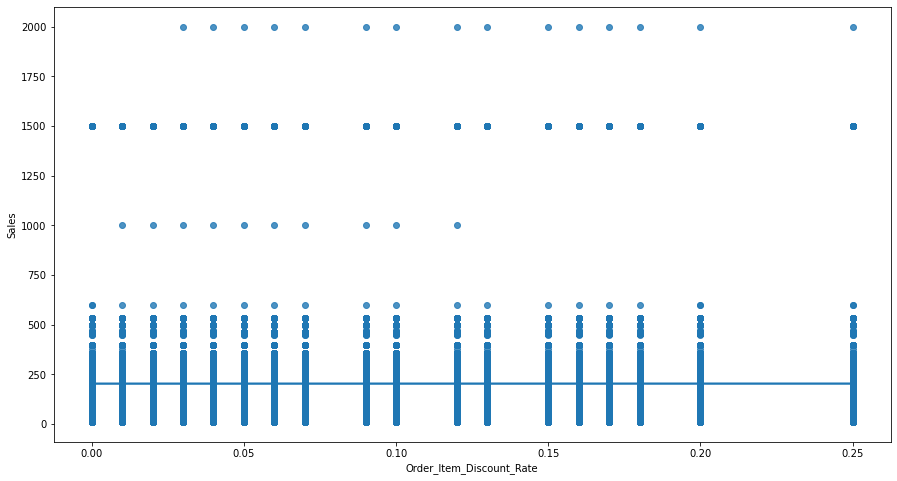

In [40]:
scatter('Order_Item_Discount_Rate','Sales')

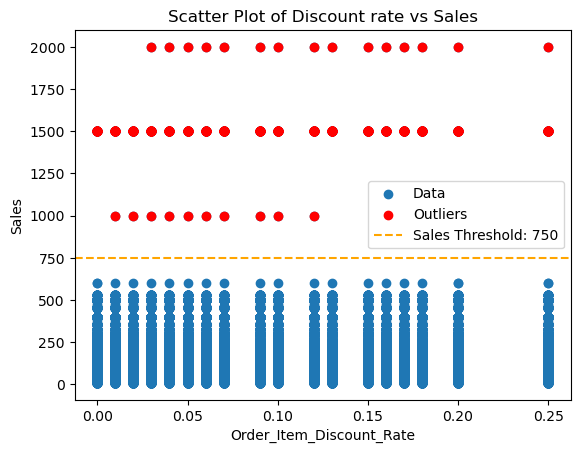

In [16]:
sales_threshold = 750

data['Z_Score_Sales'] = np.abs(stats.zscore(data['Sales']))

outliers = data[data['Z_Score_Sales'] > 3]

plt.scatter(data['Order_Item_Discount_Rate'], data['Sales'], label='Data')
plt.scatter(outliers['Order_Item_Discount_Rate'], outliers['Sales'], color='red', label='Outliers')

plt.title('Scatter Plot of Discount rate vs Sales')
plt.xlabel('Order_Item_Discount_Rate')
plt.ylabel('Sales')
plt.axhline(y=sales_threshold, color='orange', linestyle='--', label=f'Sales Threshold: {sales_threshold}')

plt.legend()
plt.show()

## The above plots show that there are significant outliers after the 750 mark. Lets clean the data by deleting the rows with sales above 750

In [17]:
data_cleaned = data[data['Z_Score_Sales'] <= 3]


In [18]:
#Shape of data before cleaning outliers
data.shape

(180519, 30)

In [19]:
# Shape of data after cleaning outliers
data_cleaned.shape

(180052, 30)

In [66]:
## Creating dummy variables for categorical variables
data = pd.get_dummies(data, columns = columns_to_convert, prefix_sep = "_", drop_first = True)
data.columns

Index(['Days_for_shipping_real', 'Days_for_shipment_scheduled',
       'Sales_per_customer', 'Late_delivery_risk', 'Department_Name',
       'Latitude', 'Longitude', 'Order_Date', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount',
       ...
       'Order_Status_COMPLETE', 'Order_Status_ON_HOLD',
       'Order_Status_PAYMENT_REVIEW', 'Order_Status_PENDING',
       'Order_Status_PENDING_PAYMENT', 'Order_Status_PROCESSING',
       'Order_Status_SUSPECTED_FRAUD', 'Shipping_Mode_Same Day',
       'Shipping_Mode_Second Class', 'Shipping_Mode_Standard Class'],
      dtype='object', length=257)

## CLUSTER ANALYSIS

In [46]:
columns_for_clustering = ['Order_Item_Discount_Rate', 'Order_Item_Total', 'Order_Profit_Per_Order']

# Extract the relevant subset of the dataframe
data_cleaned_cluster = data_cleaned[columns_for_clustering]

In [47]:
# Standardize the data
scaler = StandardScaler()
data_cleaned_cluster_scaled = scaler.fit_transform(data_cleaned_cluster)

In [48]:
# Find the optimal number of clusters using the silhouette score
from sklearn.cluster import MiniBatchKMeans

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_cleaned_cluster_scaled)
    silhouette_scores.append(silhouette_score(data_cleaned_cluster_scaled, cluster_labels))

C:\Users\sravy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\sravy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\sravy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

C:\Users\sravy\AppData\Local\Temp\ipykernel_34020\2074581030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned_cluster_scaled)


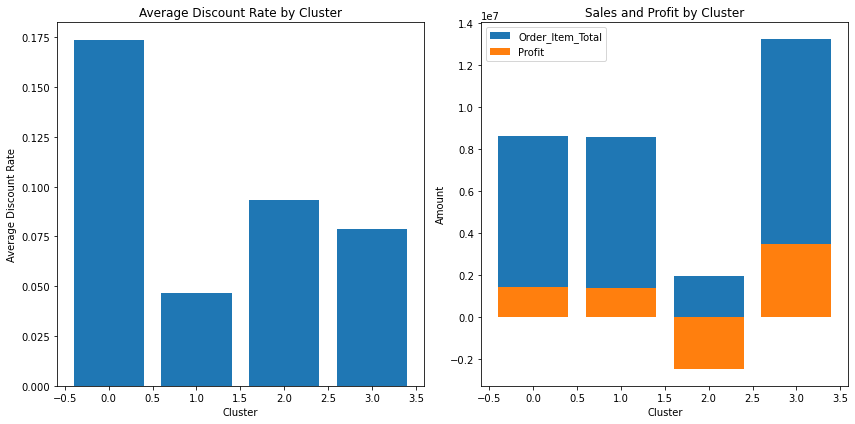

In [49]:
# Choose the optimal number of clusters based on the plot
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_cleaned_cluster_scaled)

# Analyze the clusters
cluster_analysis = data_cleaned.groupby('Cluster').agg({
    'Order_Item_Discount_Rate': 'mean',
    'Order_Item_Total': 'sum',
    'Order_Profit_Per_Order': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting discount rates
plt.subplot(1, 2, 1)
plt.bar(cluster_analysis['Cluster'], cluster_analysis['Order_Item_Discount_Rate'])
plt.title('Average Discount Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Discount Rate')

# Plotting sales and profit
plt.subplot(1, 2, 2)
plt.bar(cluster_analysis['Cluster'], cluster_analysis['Order_Item_Total'], label='Order_Item_Total')
plt.bar(cluster_analysis['Cluster'], cluster_analysis['Order_Profit_Per_Order'], label='Profit')
plt.title('Sales and Profit by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame cluster_analysis with the cluster analysis results

# Extract the cluster labels and relevant columns
cluster_labels = cluster_analysis['Cluster']
sales_column = 'Order_Item_Total'  # Replace with the actual column name
profit_column = 'Order_Profit_Per_Order'  # Replace with the actual column name
discount_rate_column = 'Order_Item_Discount_Rate'  # Replace with the actual column name

# Create StandardScaler instances
scaler_sales = StandardScaler()
scaler_profit = StandardScaler()

# Fit and transform the data for Total Sales
#cluster_analysis['Total Sales Original Scale'] = scaler_sales.fit_transform(cluster_analysis[[sales_column]])

Fit and transform the data for Total Profit
cluster_analysis['Total Profit Original Scale'] = scaler_profit.fit_transform(cluster_analysis[[profit_column]])

# Extract the average discount rate for the clusters with max sales and profit
discount_rate_max_sales = cluster_analysis.loc[cluster_analysis['Total Sales Original Scale'].idxmax()][discount_rate_column]
discount_rate_max_profit = cluster_analysis.loc[cluster_analysis['Total Profit Original Scale'].idxmax()][discount_rate_column]

# Print the results
print(f"Cluster with Highest Sales (Cluster {cluster_analysis['Cluster'].iloc[cluster_analysis['Total Sales Original Scale'].idxmax()]}):")
print(f"  Total Sales: ${cluster_analysis['Total Sales Original Scale'].max():,.2f}")
print(f"  Average Discount Rate: {discount_rate_max_sales:.4f}")

print(f"\nCluster with Highest Profit (Cluster {cluster_analysis['Cluster'].iloc[cluster_analysis['Total Profit Original Scale'].idxmax()]}):")
print(f"  Total Profit: ${cluster_analysis['Total Profit Original Scale'].max():,.2f}")
print(f"  Average Discount Rate: {discount_rate_max_profit:.4f}")

Cluster with Highest Sales (Cluster 3):
  Total Sales: $1.28
  Average Discount Rate: 0.0786

Cluster with Highest Profit (Cluster 3):
  Total Profit: $1.17
  Average Discount Rate: 0.0786


## DECISION TREES

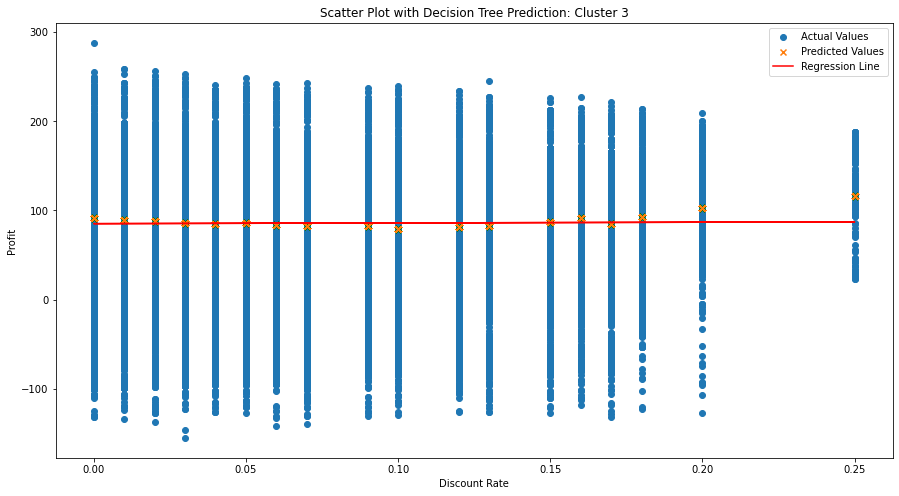

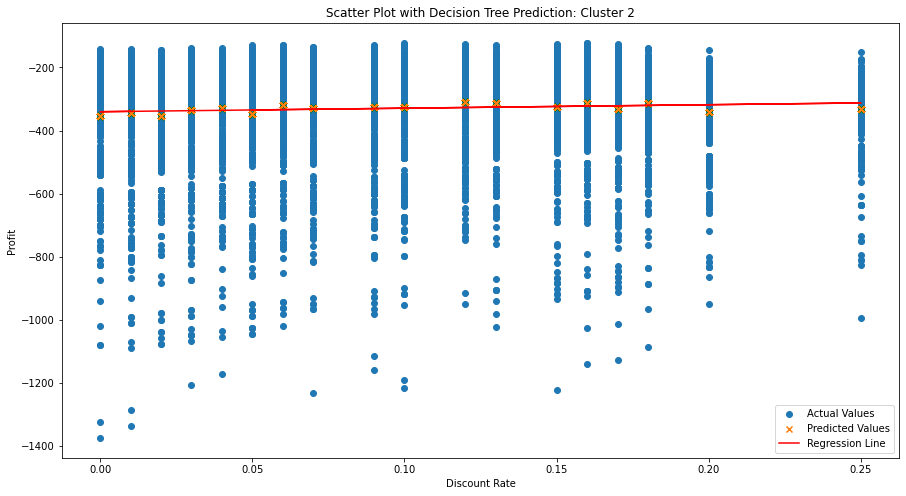

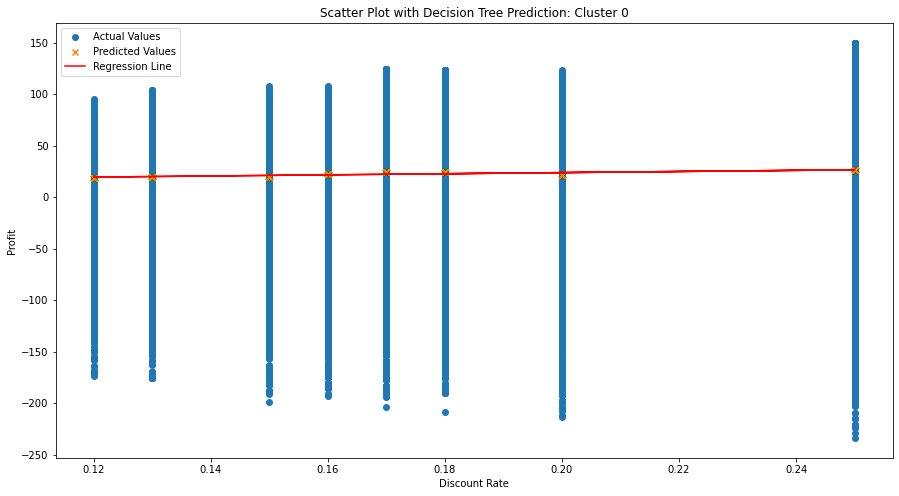

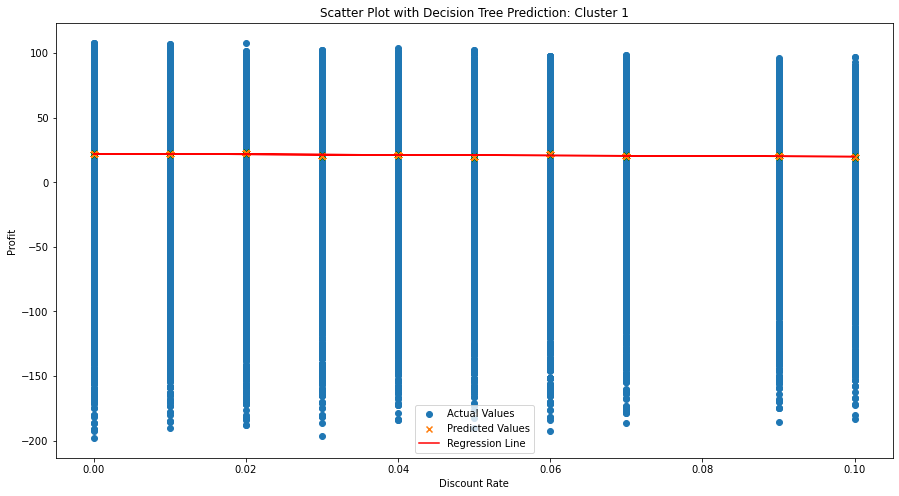

In [65]:
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import os
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'X' is the discount rate and 'y' is the target variable (sales or profit)

# Iterate over clusters
for cluster_id in data_cleaned['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = data_cleaned[data_cleaned['Cluster'] == cluster_id]
    
    # Extract features and target variable
    X = cluster_data['Order_Item_Discount_Rate'].values.reshape(-1, 1)
    y = cluster_data['Order_Profit_Per_Order'].values  # or 'Order_Profit_Per_Order'
    
    # Fit decision tree model
    model = DecisionTreeRegressor()
    model.fit(X, y)
    
    # Visualize the decision tree (optional)
    dot_data = export_graphviz(model, out_file=None, feature_names=['Discount_Rate'], filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)
    
    # Save the decision tree visualization as PNG
    image_path = f'Cluster_{cluster_id}_DecisionTree.png'
    graph.render(image_path, format='png', cleanup=True)
    
    # Display the visualization
    Image(image_path)  # Display the PNG visualization
    
    # Predict using the decision tree (optional)
    predicted_values = model.predict(X)
    
    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = linregress(X.flatten(), y)
    regression_line = intercept + slope * X
    
    # Visualize the relationship (scatter plot with regression line)
    plt.scatter(X, y, label='Actual Values')
    plt.scatter(X, predicted_values, label='Predicted Values', marker='x')
    plt.plot(X, regression_line, color='red', label='Regression Line')
    plt.title(f'Scatter Plot with Decision Tree Prediction: Cluster {cluster_id}')
    plt.xlabel('Discount Rate')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()
    
    # Remove the PDF file if created
    pdf_path = f'Cluster_{cluster_id}_DecisionTree.pdf'
    if os.path.exists(pdf_path):
        os.remove(pdf_path)


## Profit and Loss prediction using NEURAL NETWORKS

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense

from sklearn.compose import ColumnTransformer

# Create the target variable
data_cleaned['Profit_Category'] = np.where(data_cleaned['Order_Profit_Per_Order'] > 0, 'Profit', 'Loss')


# Encode the target variable
label_encoder = LabelEncoder()
data_cleaned['Profit_Category_Encoded'] = label_encoder.fit_transform(data_cleaned['Profit_Category'])

# Features and target
X = data_cleaned.drop(['Profit_Category', 'Profit_Category_Encoded', 'Order_Date', 'Shipping_Date'], axis=1)
y = data_cleaned['Profit_Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse=False))  # Ensure dense output for OneHotEncoder
        ]), non_numeric_cols)
    ],
    remainder='passthrough'  # This includes columns that are not explicitly handled by transformers (e.g., 'Profit_Category')
)

# Preprocess the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)#.toarray()
X_test_preprocessed = preprocessor.transform(X_test)#.toarray()
X_train_preprocessed = X_train_preprocessed.astype(np.float32)

# # Build the neural network model
# model = Sequential()
# model.add(Dense(64, input_dim=X_train_preprocessed.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

C:\Users\pavan\AppData\Local\Temp\ipykernel_26480\2658081377.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Profit_Category'] = np.where(data_cleaned['Order_Profit_Per_Order'] > 0, 'Profit', 'Loss')
C:\Users\pavan\AppData\Local\Temp\ipykernel_26480\2658081377.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Profit_Category_Encoded'] = label_encoder.fit_transform(data_cleaned['Profit_Category'])


Epoch 1/10
3601/3601 [==============================] - 12s 3ms/step - loss: 0.0628 - accuracy: 0.9751 - val_loss: 0.0129 - val_accuracy: 0.9947
Epoch 2/10
3601/3601 [==============================] - 9s 3ms/step - loss: 0.0230 - accuracy: 0.9906 - val_loss: 0.0130 - val_accuracy: 0.9949
Epoch 3/10
3601/3601 [==============================] - 10s 3ms/step - loss: 0.0189 - accuracy: 0.9919 - val_loss: 0.0112 - val_accuracy: 0.9948
Epoch 4/10
3601/3601 [==============================] - 11s 3ms/step - loss: 0.0173 - accuracy: 0.9925 - val_loss: 0.0119 - val_accuracy: 0.9950
Epoch 5/10
3601/3601 [==============================] - 12s 3ms/step - loss: 0.0154 - accuracy: 0.9939 - val_loss: 0.0096 - val_accuracy: 0.9965
Epoch 6/10
3601/3601 [==============================] - 20s 6ms/step - loss: 0.0146 - accuracy: 0.9939 - val_loss: 0.0095 - val_accuracy: 0.9968
Epoch 7/10
3601/3601 [==============================] - 17s 5ms/step - loss: 0.0143 - accuracy: 0.9943 - val_loss: 0.0094 - val_acc

In [36]:
from sklearn.model_selection import StratifiedKFold

data_cleaned['Profit_Category'] = np.where(data_cleaned['Order_Profit_Per_Order'] > 0, 'Profit', 'Loss')

# Encode the target variable
label_encoder = LabelEncoder()
data_cleaned['Profit_Category_Encoded'] = label_encoder.fit_transform(data_cleaned['Profit_Category'])

# Features and target
X = data_cleaned.drop(['Profit_Category', 'Profit_Category_Encoded', 'Order_Date', 'Shipping_Date'], axis=1)
y = data_cleaned['Profit_Category_Encoded']


X_preprocessed = preprocessor.fit_transform(X).astype(np.float32)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_preprocessed.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

# Initialize StratifiedKFold
n_splits = 5  # You can adjust the number of splits
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

# Cross-validation loop
for train_index, test_index in skf.split(X_preprocessed, y):
    X_train_fold, X_test_fold = X_preprocessed[train_index], X_preprocessed[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Reset the model weights for each fold
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_preprocessed.shape[1],)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set for this fold
    _, accuracy, precision, recall, roc_auc = model.evaluate(X_test_fold, y_test_fold, verbose=0)

    # Store the evaluation metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)

# Calculate and print mean and standard deviation of evaluation metrics
print(f'Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}')
print(f'Mean Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}')
print(f'Mean Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}')
print(f'Mean ROC AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}')

C:\Users\pavan\AppData\Local\Temp\ipykernel_26480\2248571441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Profit_Category'] = np.where(data_cleaned['Order_Profit_Per_Order'] > 0, 'Profit', 'Loss')
C:\Users\pavan\AppData\Local\Temp\ipykernel_26480\2248571441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Profit_Category_Encoded'] = label_encoder.fit_transform(data_cleaned['Profit_Category'])


Mean Accuracy: 0.9967 ± 0.0007
Mean Precision: 0.9979 ± 0.0007
Mean Recall: 0.9980 ± 0.0008
Mean ROC AUC: 0.9999 ± 0.0000


In [125]:
# Make predictions on the test set
predictions = model.predict(X_test_preprocessed)
predictions_binary = (predictions > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions_binary))

1126/1126 [==============================] - 3s 2ms/step
Confusion Matrix:
[[ 6966   119]
 [   35 28891]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7085
           1       1.00      1.00      1.00     28926

    accuracy                           1.00     36011
   macro avg       1.00      0.99      0.99     36011
weighted avg       1.00      1.00      1.00     36011



In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test and y_pred_binary are your true labels and predicted labels
precision = precision_score(y_test, predictions_binary)
recall = recall_score(y_test, predictions_binary)
f1 = f1_score(y_test, predictions_binary)
roc_auc = roc_auc_score(y_test, predictions_binary)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Precision: 0.9959
Recall: 0.9988
F1-Score: 0.9973
ROC-AUC: 0.9910


## Percentage of number of profit and loss transactions - (Dataset)

Percentage of transactions that result in Profit: 80.63%
Percentage of transactions that result in Loss: 19.37%


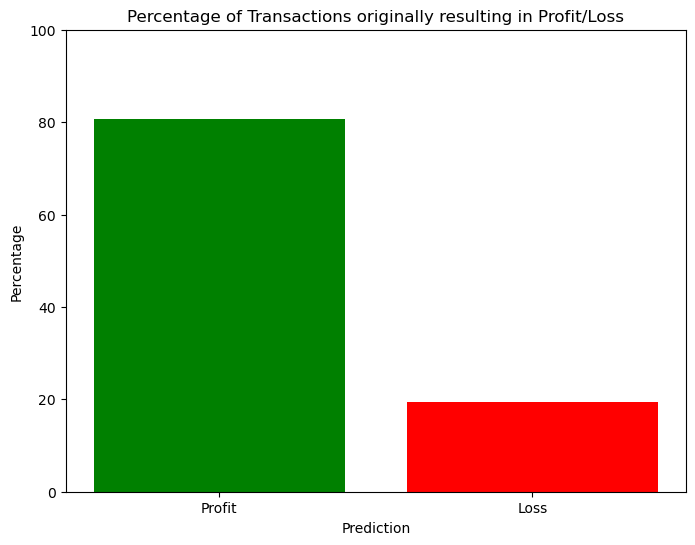

In [130]:
percent_profit = (data_cleaned['Profit_Category'] == 'Profit').sum() / len(data_cleaned) * 100
percent_loss = (data_cleaned['Profit_Category'] == 'Loss').sum() / len(data_cleaned) * 100

print(f'Percentage of transactions that result in Profit: {percent_profit:.2f}%')
print(f'Percentage of transactions that result in Loss: {percent_loss:.2f}%')

labels = ['Profit', 'Loss']
percentages = [percent_profit, percent_loss]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['green', 'red'])
plt.title('Percentage of Transactions originally resulting in Profit/Loss')
plt.xlabel('Prediction')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are within the range
plt.show()


## Percentage of number of profit and loss transactions - (Predicted)

1126/1126 [==============================] - 2s 2ms/step
Percentage of predictions classified as Profit: 80.63%
Percentage of predictions classified as Loss: 19.37%


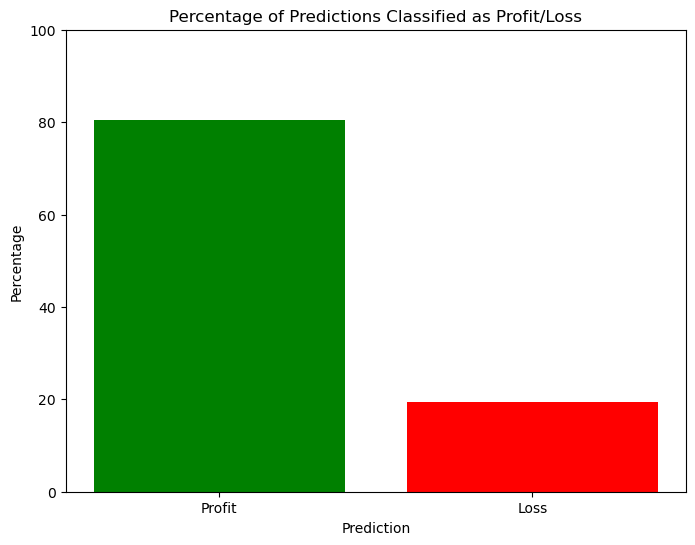

In [131]:
y_pred = model.predict(X_test_preprocessed)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the percentage of predictions that are profit and loss
percent_profit_pred = (y_pred_binary == 1).sum() / len(y_pred) * 100
percent_loss_pred = (y_pred_binary == 0).sum() / len(y_pred) * 100

print(f'Percentage of predictions classified as Profit: {percent_profit:.2f}%')
print(f'Percentage of predictions classified as Loss: {percent_loss:.2f}%')

labels = ['Profit', 'Loss']
percentages = [percent_profit_pred, percent_loss_pred]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['green', 'red'])
plt.title('Percentage of Predictions Classified as Profit/Loss')
plt.xlabel('Prediction')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are within the range
plt.show()